**Assumption**

BARCODE should be the primary key since the relationship between PRODUCT table and TRANSACTIONS table is 1 to Many.

In [1]:
# Data Quality Check for PRODUCTS_TAKEHOME
import pandas as pd

In [2]:
df_product = pd.read_csv("PRODUCTS_TAKEHOME.csv")
df_product.head()

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11


In [3]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845552 entries, 0 to 845551
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CATEGORY_1    845441 non-null  object 
 1   CATEGORY_2    844128 non-null  object 
 2   CATEGORY_3    784986 non-null  object 
 3   CATEGORY_4    67459 non-null   object 
 4   MANUFACTURER  619078 non-null  object 
 5   BRAND         619080 non-null  object 
 6   BARCODE       841527 non-null  float64
dtypes: float64(1), object(6)
memory usage: 45.2+ MB


**Quality issues I found**
1. BARCODE type is float64. Should be INT accroding to the ER diagram

In [4]:
# Completeness - Check for missing values
missing_values = df_product.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 CATEGORY_1         111
CATEGORY_2        1424
CATEGORY_3       60566
CATEGORY_4      778093
MANUFACTURER    226474
BRAND           226472
BARCODE           4025
dtype: int64


In [5]:
# Remove duplicate and null BARCODE values
df_product = df_product.drop_duplicates(subset=['BARCODE']).dropna(subset=['BARCODE'])

# Change the data type
df_product['BARCODE'] = df_product['BARCODE'].astype(int)

**Quality issues I found**
1. CATEGORY_3 (60,000+ missing) and CATEGORY_4 is nearly 90% missing - can think about remove these columns.

2. MANUFACTURER and BRAND have 226,000+ missing values, possibly causing classification issues.

3. BARCODE as primary key should not be unique and not null.


In [6]:
# Check for duplicate BARCODEs
duplicate_barcodes = df_product['BARCODE'].duplicated().sum()
print("Duplicate BARCODE Count:", duplicate_barcodes)

Duplicate BARCODE Count: 0


In [7]:
df_product['BARCODE'] = df_product['BARCODE'].astype(str)
df_product['BARCODE_LENGTH'] = df_product['BARCODE'].str.len()

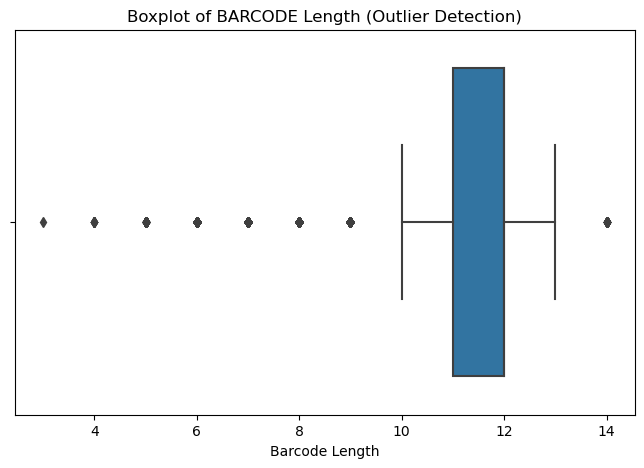

In [8]:
# Boxplot to detect outliers in BARCODE length

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_product['BARCODE_LENGTH'])
plt.title("Boxplot of BARCODE Length (Outlier Detection)")
plt.xlabel("Barcode Length")
plt.show()

**Quality issues I found:**

The barcode length distribution reveals outliers:

1. Short barcodes (<8 digits) may indicate truncated or placeholder values.

2. Long barcodes (>13 digits) could result from data entry errors or format inconsistencies.

In [9]:
# Summary statistics
print("Summary Statistics:\n", df_product.describe(include='all'))

Summary Statistics:
                CATEGORY_1 CATEGORY_2        CATEGORY_3 CATEGORY_4  \
count              841231     840681            782629      67232   
unique                 27        121               341        126   
top     Health & Wellness      Candy  Confection Candy  Lip Balms   
freq               510382     120620             56911       9712   
mean                  NaN        NaN               NaN        NaN   
std                   NaN        NaN               NaN        NaN   
min                   NaN        NaN               NaN        NaN   
25%                   NaN        NaN               NaN        NaN   
50%                   NaN        NaN               NaN        NaN   
75%                   NaN        NaN               NaN        NaN   
max                   NaN        NaN               NaN        NaN   

                    MANUFACTURER      BRAND       BARCODE  BARCODE_LENGTH  
count                     615125     615127        841342   841342.000000 

In [10]:
# Data Cleaning

# Remove outliers on Barcode value
df_product = df_product[df_product['BARCODE'].str.len().between(8, 13)]

# Change the data type
df_product['BARCODE'] = df_product['BARCODE'].astype(int)

# Change the data type
df_product['BARCODE'] = df_product['BARCODE'].astype(int)

In [11]:
df_product.to_csv("cleaned_product_takehome.csv", index=False)